In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

titr = pd.read_excel(r"данные.xlsx")
titr

,"объем титранта, мкл",pH,"проводимость, мкСм/см","объем титранта, мл"
0,10,7.953,83.48,0.01
1,20,8.202,91.88,0.02
2,30,8.414,103.68,0.03
3,40,8.561,115.38,0.04
4,50,8.636,122.08,0.05
5,70,8.817,141.88,0.07
6,90,8.977,164.08,0.09
7,120,9.161,196.78,0.12
8,150,9.321,231.00,0.15
9,180,9.453,263.00,0.18


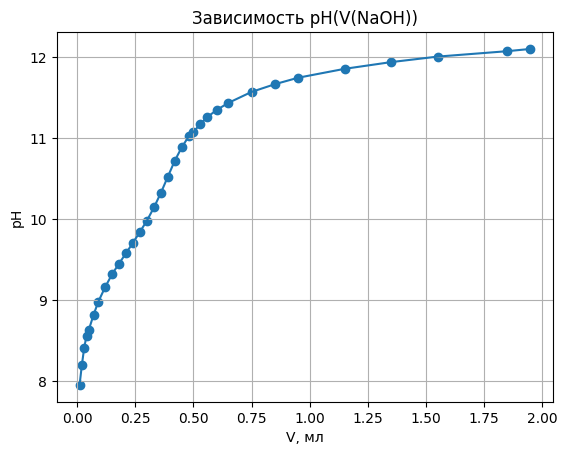

In [2]:
plt.title("Зависимость pH(V(NaOH))")
plt.xlabel("V, мл")
plt.ylabel("pH")

x = titr['объем титранта, мл']
y = titr['pH']

plt.plot(x, y)

plt.scatter(x, y)
plt.grid()
plt.show()

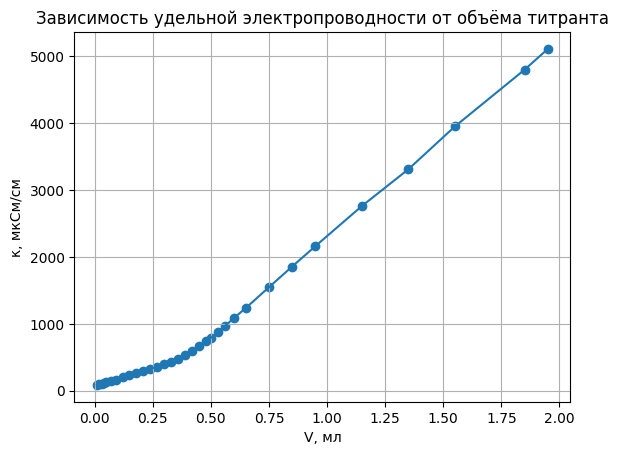

In [3]:
plt.title("Зависимость удельной электропроводности от объёма титранта")
plt.xlabel("V, мл")
plt.ylabel("κ, мкСм/см")

x = titr['объем титранта, мл']
y = titr['проводимость, мкСм/см']

plt.plot(x, y)

plt.scatter(x, y)
plt.grid()
plt.show()

In [4]:
titr2 = pd.read_excel(r"титрование (2).xlsx")
titr2

,"объем титранта, мкл",pH,"проводимость, мкСм/см","объем титранта, мл"
0,600,11.350,1085,0.60
1,650,11.437,1233,0.65
2,750,11.573,1545,0.75
3,850,11.668,1855,0.85
4,950,11.748,2160,0.95
5,1150,11.858,2760,1.15
6,1350,11.941,3310,1.35
7,1550,12.009,3950,1.55
8,1850,12.076,4800,1.85
9,1950,12.104,5110,1.95


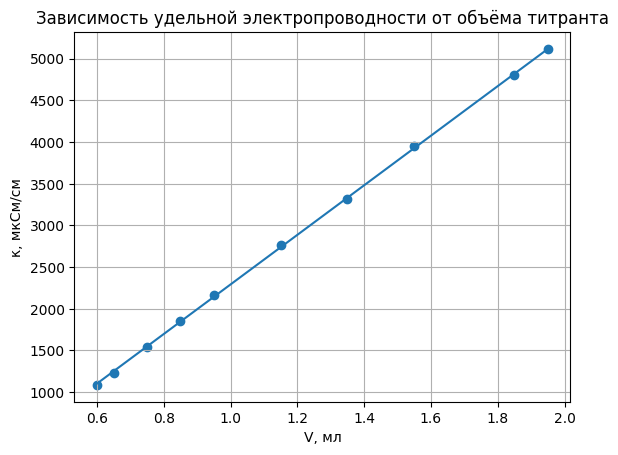

k = 2973.4500633567563


In [5]:
plt.title("Зависимость удельной электропроводности от объёма титранта")
plt.xlabel("V, мл")
plt.ylabel("κ, мкСм/см")

x = titr2['объем титранта, мл']
y = titr2['проводимость, мкСм/см']

fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit)

plt.plot(x, fit_fn(x))

plt.scatter(x, y)
plt.grid()
plt.show()

k = fit[0]
print('k =', k)

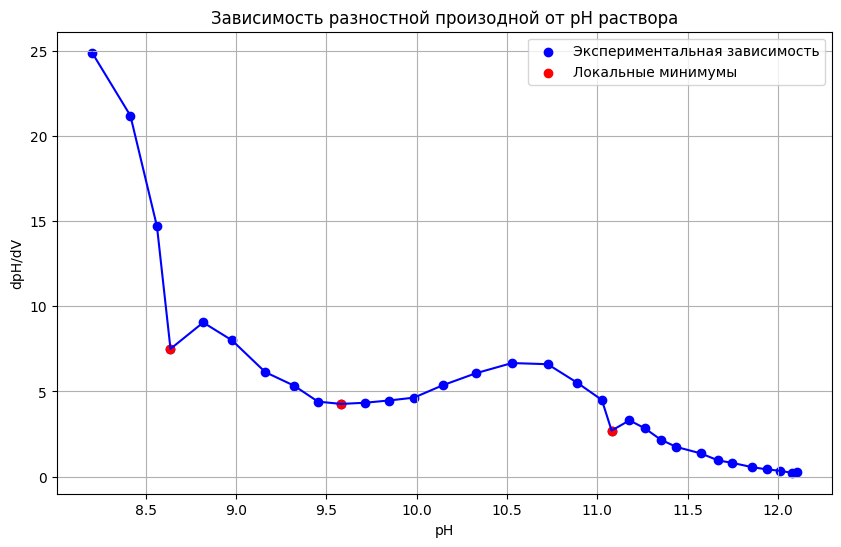

Локальные минимумы:
X = 0.05, Z = 8.64
X = 0.21, Z = 9.58
X = 0.50, Z = 11.08


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Пример массивов X и Z
X = np.array(titr['объем титранта, мл'])
Z = np.array(titr['pH'])

# Вычисляем разности между соседними элементами
delta_X = X[:-1] - X[1:]  # X_{n-1} - X_n
delta_Z = Z[:-1] - Z[1:]  # Z_{n-1} - Z_n

# Вычисляем значение (X_{n-1} - X_n) / (Z_{n-1} - Z_n)
ratio = delta_Z / delta_X

# Ищем локальные минимумы
# Используем -ratio, так как find_peaks ищет максимумы
minima_indices, _ = find_peaks(-ratio, prominence=0.1)  # prominence задает минимальную значимость минимума

# Соответствующие значения Z и X для локальных минимумов
Z_minima = Z[minima_indices + 1]  # +1, так как ratio на один элемент короче
X_minima = X[minima_indices + 1]

# Построим график
plt.figure(figsize=(10, 6))
plt.scatter(Z[1:], ratio, color='blue', label="Экспериментальная зависимость")
plt.plot(Z[1:], ratio, color='blue')

# Отмечаем локальные минимумы на графике
plt.scatter(Z_minima, ratio[minima_indices], color='red', label="Локальные минимумы")

# Подписываем точки минимумов
#for i, (x, z) in enumerate(zip(X_minima, Z_minima)):
#    plt.text(z, ratio[minima_indices[i]], f"({x:.2f}, {z:.2f})", fontsize=9, ha='right')

plt.title("Зависимость разностной произодной от pH раствора")
plt.xlabel("pH")
plt.ylabel("dpH/dV")
plt.grid(True)
plt.legend()
plt.show()

# Выводим локальные минимумы
print("Локальные минимумы:")
for x, z in zip(X_minima, Z_minima):
    print(f"X = {x:.2f}, Z = {z:.2f}")

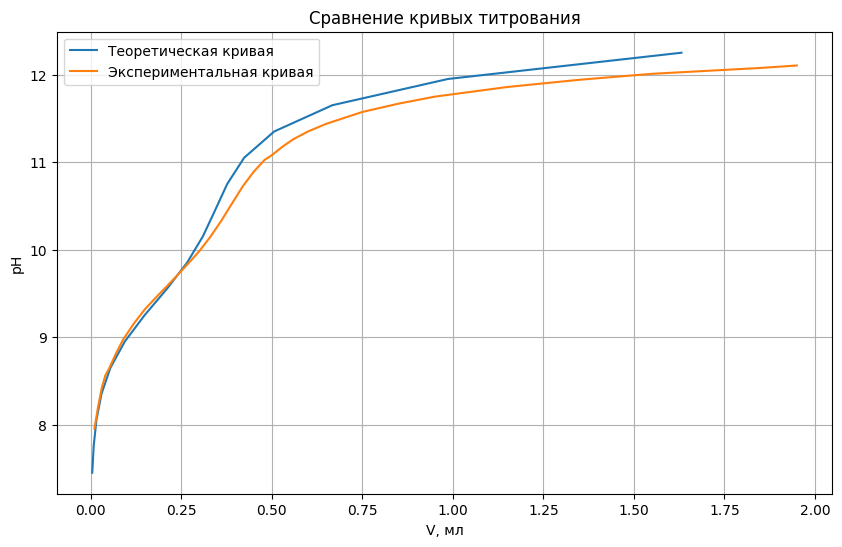

In [7]:
import numpy as np
import matplotlib.pyplot as plt

k1 = 4.17 * 10**(-3)
k2 = 4.07 * 10**(-10)

pH = [7.45, 7.75, 8.05, 8.35, 8.65, 8.95, 9.25, 9.55, 9.85, 10.15, 10.45, 10.75, 11.05, 11.35, 11.65, 11.95, 12.25]
H = [10**(-y) for y in pH]
A = []
Na = []
V_Na = []
for h in H:
    a = 0.005/(1 + h/k2 + (h**2)/(k1*k2))
    A.append(a)
    na = a + (10**(-14))/h - (a*h**2)/(k1*k2)
    Na.append(na)
    v = (70*na)/(1-na)
    V_Na.append(v)


X = titr['объем титранта, мл']
Y = titr['pH']


plt.figure(figsize=(10, 6))
plt.plot(V_Na, pH, label="Теоретическая кривая")
plt.plot(X,Y, label="Экспериментальная кривая")


plt.title("Сравнение кривых титрования")
plt.xlabel("V, мл")
plt.ylabel("pH")
plt.grid(True)
plt.legend()
plt.show()

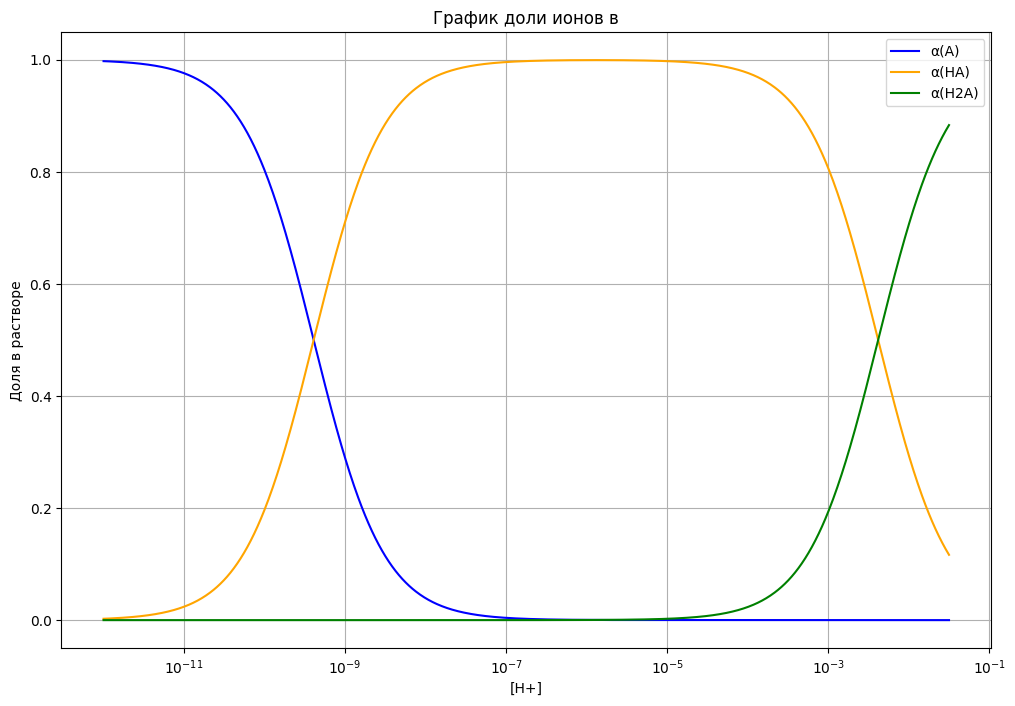

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Определение констант
k1 = 4.17 * 10**(-3)
k2 = 4.07 * 10**(-10)

# Определение диапазона x
x = np.logspace(np.log10(3.16 * 10**(-2)), np.log10(1 * 10**(-12)), 1000)

# Вычисление значений функций
denominator = k1 * k2 + k1 * x + x**2

a1 = (k1 * k2) / denominator
a2 = (k1 * x) / denominator
a3 = (x**2) / denominator

# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(x, a1, label='α(A)', color='blue')
plt.plot(x, a2, label='α(HA)', color='orange')
plt.plot(x, a3, label='α(H2A)', color='green')

# Настройка графика
plt.title('График доли ионов в')
plt.xlabel('[H+]')
plt.ylabel('Доля в растворе')
plt.legend()
plt.grid()
plt.xscale('log')  # Логарифмическая шкала по оси X для лучшего отображения
#plt.ylim(0, np.max([a1.max(), a2.max(), a3.max(), a4.max()]) * 1.1)  # Устанавливаем лимит по y

# Показать график
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8908\3247388911.py:29: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  H_solution = fsolve(equation, H_initial)
C:\Users\admin\AppData\Local\Temp\ipykernel_8908\3247388911.py:29: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  H_solution = fsolve(equation, H_initial)


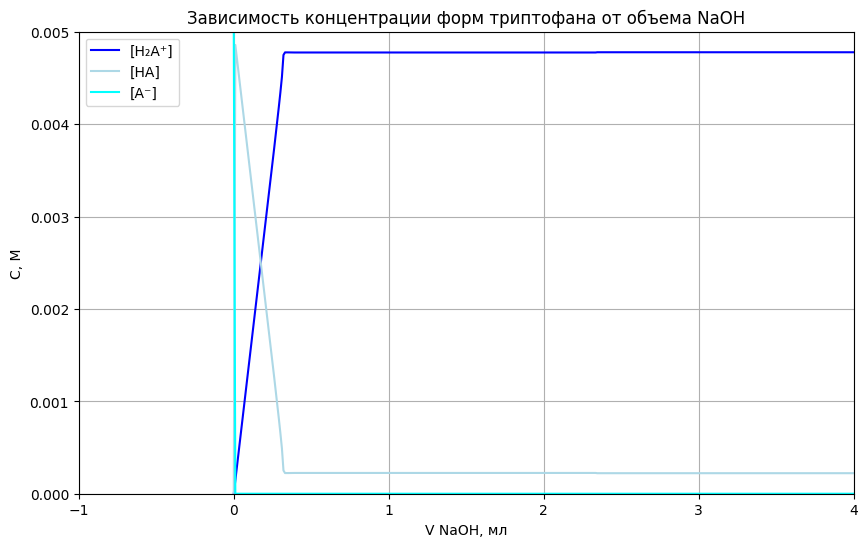

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Константы диссоциации
K1 = 10**(-2)  
K2 = 10**(-10)   

C0 = 0.005          # М
V0 = 70            # мл

V_NaOH = np.linspace(0, 5, 500)

# Функция для расчета [H+]
def calculate_H(V_NaOH):
    # Обработка отрицательных объемов (n_OH не может быть < 0)
    n_OH = max(V_NaOH * 1, 0)  # ммоль (1M NaOH)
    V_total = V0 + max(V_NaOH, 0)  # Объем не может быть меньше V0

    def equation(H):
        H = H[0]
        denominator = K1*K2 + K1*H + H**2
        n_H2A = (C0 * H**2 / denominator) * V_total
        n_HA = (C0 * K1 * H / denominator) * V_total
        n_A = (C0 * K1*K2 / denominator) * V_total
        return (n_H2A*1 + n_HA*0 - n_OH) - (1e-3 * V_total * H)

    H_initial = 1e-7 if V_NaOH >= 0 else 1e-1  # Начальное приближение для H+
    H_solution = fsolve(equation, H_initial)
    return H_solution[0]

# Рассчитаем [H+] для каждого объема NaOH
H_values = np.array([calculate_H(V) for V in V_NaOH])
# Концентрации форм триптофана
denominator = K1*K2 + K1*H_values + H_values**2
A = (C0 * K1*K2) / denominator
HA = (C0 * K1 * H_values) / denominator
H2A = (C0 * H_values**2) / denominator

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(V_NaOH, H2A, label="[H₂A⁺]", color="blue")
plt.plot(V_NaOH, HA, label="[HA]", color="lightblue")
plt.plot(V_NaOH, A, label="[A⁻]", color="cyan")

plt.title("Зависимость концентрации форм триптофана от объема NaOH")
plt.xlabel("V NaOH, мл")
plt.ylabel("C, М")
plt.legend()
plt.grid(True)
plt.xlim(-1, 4)
plt.ylim(0, C0)
plt.show()